In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from core.envs.grid_world import *
from core.rl_utils import *

## The grid world environment
The environment has 8x8 cells, and the agent can execute 4 actions: UP-RIGHT-DOWN-LEFT. The reward is -1 for every state other than the goal state, and +1 at the goal state. The goal state is a terminal state.

<IPython.core.display.Javascript object>


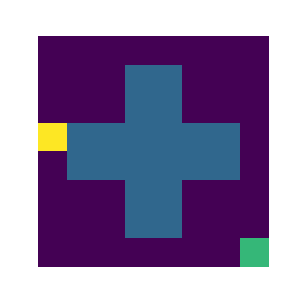

In [2]:
env = Grid_World()                         # Instance of the environment
state = env.reset()                        # Reset the environment
for step in range(50):                     # Loop over steps
    action = np.random.randint(4)          # Select random action
    state, reward, done = env.step(action) # Execute selected action
    env.render()                           # Render environment

## Tabular Q-learning: training the agent

<IPython.core.display.Javascript object>


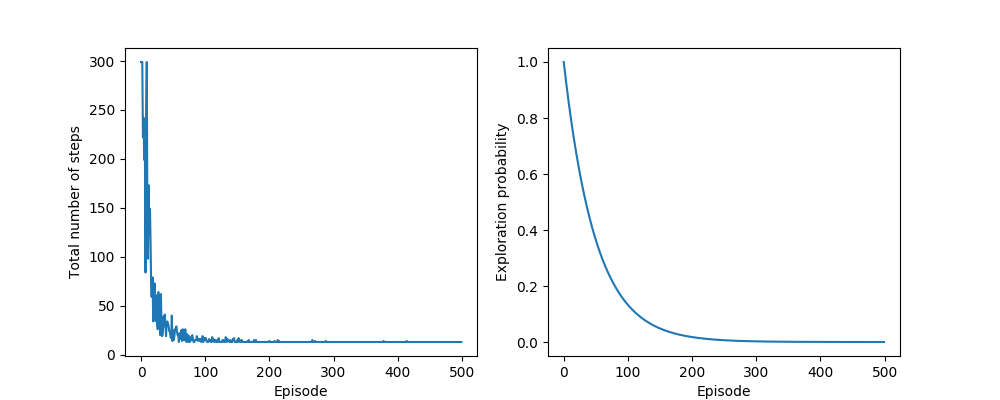

In [3]:
np.random.seed(123) # For reproducibility

env = Grid_World()          # Create an instance of the environment

num_actions = env.num_actions           # Number of actions
Q_table = np.zeros((8, 8, num_actions)) # Initial Q-table

num_episodes = 500                      # Number of training episodes
num_steps = 300                         # Number of steps per episode
epsilon = 1.0                           # Initial exploration probability
alpha = 0.5                             # Learning rate
gamma = 0.99                            # Discount factor

total_steps_log = []            # Empty list to log number of steps per episode 
epsilon_log = []                # Empty list to log exploration probabilities

for e in range(num_episodes):           # Loop over episodes
    state = env.reset()                 # Reset environment
        
    for s in range(num_steps):                          # Loop over steps
        if(np.random.random() <= epsilon):              # espilon-greedy policy
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(Q_table[state[0], state[1], :])
        
        next_state, reward, done = env.step(action)     # Execute selected action

        # Q-table update
        target = reward + gamma * np.max(Q_table[next_state[0], next_state[1], :])        
        Q_table[state[0], state[1], action] += alpha * (target - Q_table[state[0], state[1], action])
        
        if(done):   # End episode at terminal state    
            break
            
        state = next_state.copy() # Update current state
        
    total_steps_log.append(s)     # Append total number of steps
    epsilon_log.append(epsilon)   # Append exploration probability 
    epsilon = 0.98 * epsilon      # Exploration decay
    
    
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(total_steps_log)
plt.xlabel('Episode')
plt.ylabel('Total number of steps')

plt.subplot(122)
plt.plot(epsilon_log)
plt.xlabel('Episode')
plt.ylabel('Exploration probability');

## Testing the trained agent

<IPython.core.display.Javascript object>


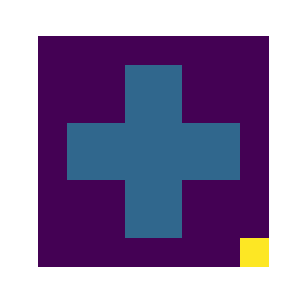

In [4]:
env = Grid_World()          # Create an instance of the environment
for e in range(20):         # Loop over testing episodes
    state = env.reset()     # Reset environment
    for s in range(50):     # Loop over steps
        action = np.argmax(Q_table[state[0], state[1], :]) # greedy policy
        state, _, done = env.step(action)                  # Execute selected action
        env.render()                                       # Render environment
        if done:                                           # End episode at terminal state
            break

## Visualizing the learned policy

<IPython.core.display.Javascript object>


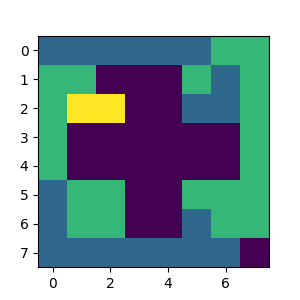

<IPython.core.display.Javascript object>


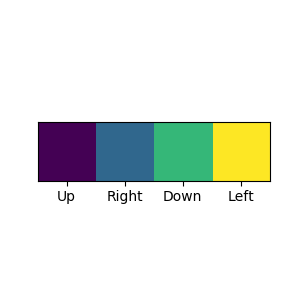

In [5]:
policy = -1*np.ones((8, 8))                         # Initialize policy
for i in range(8):                                  # Loop over rows
    for j in range(8):                              # Loop over columns
        policy[i, j] = np.argmax(Q_table[i, j, :])  # Save the policy's action

        
# Plot learned policy
plt.figure(figsize=(3,3))
plt.imshow(policy, vmin=0, vmax=3)

# Plot color conventions
plt.figure(figsize=(3,3))
plt.imshow(np.arange(num_actions).reshape(1, -1));
plt.yticks([])
plt.xticks([0, 1, 2, 3], ['Up', 'Right', 'Down', 'Left']);